# kd树构造

In [32]:
Dataset = [[2,3],[5,4],[9,6],[4,7],[8,1],[7,2]]


def createTree(points, depth):
    l = len(points)
    if len(points) == 0:
        return None
    k = depth % len(points[0])
    points.sort(key=lambda elem:elem[k])
    mid = int(l/2); left = mid - 1; right = mid + 1
    cur = [points[mid]]
    while left >= 0:
        if points[left][k] == points[mid][k]:
            cur.append(points[left])
            left -= 1
        else: break
    while right < len(points):
        if points[right][k] == points[mid][k]:
            cur.append(points[right])
            right += 1
        else: break
    return {"points":cur,
            "cur":points[mid][k],
            "left":createTree(points[0:left+1], depth+1),
            "right":createTree(points[right:len(points)], depth+1)}

root = createTree(Dataset, 0)


## 生成平衡二叉树展示

In [33]:
root

{'points': [[7, 2]],
 'cur': 7,
 'left': {'points': [[5, 4]],
  'cur': 4,
  'left': {'points': [[2, 3]], 'cur': 2, 'left': None, 'right': None},
  'right': {'points': [[4, 7]], 'cur': 4, 'left': None, 'right': None}},
 'right': {'points': [[9, 6]],
  'cur': 6,
  'left': {'points': [[8, 1]], 'cur': 8, 'left': None, 'right': None},
  'right': None}}

# kd树搜索

In [53]:
pred_Point = [5, 5]
dist = float ("inf")
target = []

import math
def distance(p1, p2):
    d = 0
    for i in range(len(p1)):
        d += math.pow(p1[i]-p2[i], 2)
    return d

def search_kdTree(pred_Point, root, depth):
    if root is None: return
    global dist, target
    k = depth % len(pred_Point)

    if pred_Point[k] < root["cur"]: 
        search_kdTree(pred_Point, root["left"], depth+1)
    else: 
        search_kdTree(pred_Point, root["right"], depth+1)

    for p in root["points"]:
        d = distance(p, pred_Point)
        if d < dist:
            dist = d
            target.append(p)
            
    if math.pow(pred_Point[k] - root["cur"], 2) < dist:
        if pred_Point[k] < root["cur"]: 
            search_kdTree(pred_Point, root["right"], depth+1)
        else: 
            search_kdTree(pred_Point, root["left"], depth+1)
                


search_kdTree(pred_Point, root, 0)
print(target)

[[4, 7], [5, 4]]


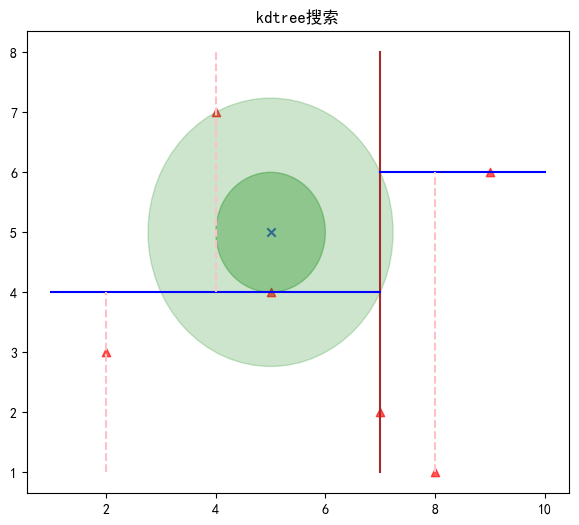

In [61]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

fig2 = plt.figure(num=2, figsize=(7, 6))
axes2 = fig2.add_subplot(1, 1, 1)
plt.title("kdtree搜索")
plt.rcParams['font.sans-serif']=['SimHei']

for i, p in enumerate(Dataset):
    plt.scatter(p[0], p[1], c='r', marker='^',alpha=0.65)

x = [7, 7]; y=[1, 8]
plt.plot(x, y, color='brown')
x = [1, 7]; y=[4, 4]
plt.plot(x, y, color='blue')
x = [7, 10]; y=[6, 6]
plt.plot(x, y, color='blue')
x = [2, 2]; y=[1, 4]
plt.plot(x, y, color='pink', linestyle='--')
x = [4, 4]; y=[4, 8]
plt.plot(x, y, color='pink', linestyle='--')
x = [8, 8]; y=[1, 6]
plt.plot(x, y, color='pink', linestyle='--')

plt.scatter(pred_Point[0], pred_Point[1], c='b', marker='x',alpha=0.65)
alpha=0.1
for p in target:
    alpha += 0.1
    c= Circle(xy=(pred_Point[0], pred_Point[1]), radius=math.sqrt(distance(p, pred_Point)), alpha=alpha, color='green')  # 圆
    axes2.add_patch(c)


plt.show()